## T1 Linear regression with Sklearn

The package "scikit-learn" is commonly used for regression (and further extended to machine learning). This tutorial needs "numpy" and "scikit-learn" for the linear regression. Commonly, doing regression follows 4 steps below:

1. Import the data.

2. Run the regression model.

3. Check the result and residual. (Why?) 
    
4. Forecast on the test data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

### Step 1. Import/Setup the data.

In [2]:
# Define "x" variables
comp = np.array([4, 3, 2, 4, 1, 2, 5, 4])
cus = np.array([20, 7, 12, 11.5, 4.5, 13, 12.5, 12])
pred_var = np.column_stack((comp, cus))

# Define "y" variable
sales = np.array([385, 220, 285, 17, 190, 365, 210, 170])

In [3]:
print(pred_var)

[[ 4.  20. ]
 [ 3.   7. ]
 [ 2.  12. ]
 [ 4.  11.5]
 [ 1.   4.5]
 [ 2.  13. ]
 [ 5.  12.5]
 [ 4.  12. ]]


In [4]:
print(sales)

[385 220 285  17 190 365 210 170]


### Step 2. Run the regression model.

In [5]:
# Run the model.
model = LinearRegression().fit(pred_var, sales)

In [6]:
# Check the R-square value: is it a good model?
r_sq = model.score(pred_var, sales)
print(f"R Square: {r_sq}")

R Square: 0.5843033344400348


In [7]:
print(f"R Square: {round(r_sq,3)}")

R Square: 0.584


### Step 3. Get the result.

In [8]:
print(f"Intercept: {round(model.intercept_,3)}") #This is b0.
print(f"Coefficients: {np.round(model.coef_,3)}") # These are b1 and b2.

Intercept: 163.209
Coefficients: [-60.106  22.043]


In [9]:
# model.predict() can be used to directly calculated the predicted "y".
pred_sales = model.predict(pred_var)
print(f"Predicted sales:")
print(np.round(pred_sales,3))

Predicted sales:
[363.645 137.192 307.513 176.28  202.296 329.556 138.217 187.301]


In [10]:
# The alternative way is to use y=b0+b1x1+b2x2.
pred_sales2 = model.intercept_ + np.sum(model.coef_ * pred_var, axis=1)
print(f"Predicted sales:")
print(np.round(pred_sales2,3))

Predicted sales:
[363.645 137.192 307.513 176.28  202.296 329.556 138.217 187.301]


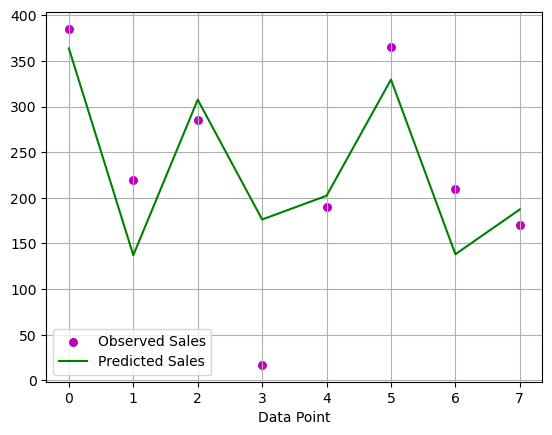

In [11]:
# Plot the result: does the model predict well?
plt.scatter(np.arange(len(pred_var)), sales, color = "m",
               marker = "o", s = 30, label="Observed Sales")
plt.plot(np.arange(len(pred_var)), pred_sales, color = "g", label="Predicted Sales")
plt.xlabel("Data Point")
plt.legend()
plt.grid()
plt.show()

In [12]:
# Calculate the residual/error.
pred_error = sales - pred_sales
print(f"Predicted Errors:")
print(np.round(pred_error,3))

Predicted Errors:
[  21.355   82.808  -22.513 -159.28   -12.296   35.444   71.783  -17.301]


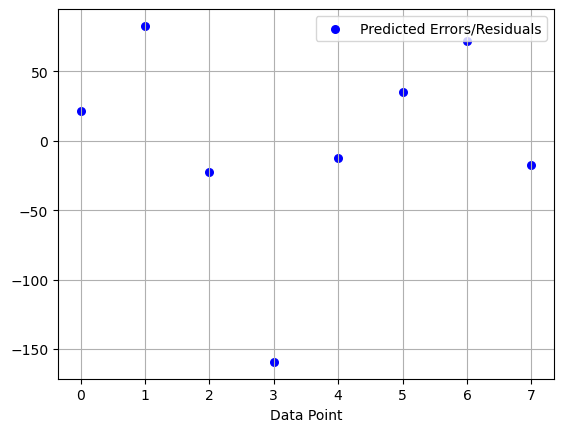

In [13]:
# Plot the residual: does it satisfy the linear regression assumption?
plt.scatter(np.arange(len(pred_var)), pred_error, color = "b",
               marker = "o", s = 30, label="Predicted Errors/Residuals")
plt.xlabel("Data Point")
plt.legend()
plt.grid()
plt.show()

### Step 4. Forecast on the test data.

In [14]:
test_comp = np.array([6, 2, 3])
test_cus = np.array([14, 7, 12.5])
test_var = np.column_stack((test_comp, test_cus))

In [15]:
test_sales = model.predict(test_var)
print(f"Predicted sales for new locations:")
print(np.round(test_sales,3))

Predicted sales for new locations:
[111.176 197.298 258.428]


The best location is location C.